In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('G:\\Users\HP\Downloads\Crop_Recommend.csv')

In [3]:
df.head()

,SO2,NO2,RSPM,SPM,N,P,K,temperature,humidity,ph,rainfall,label
0,8.140827,16.266625,101.913435,149.424864,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,9.140827,16.266625,80.913435,144.424864,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,10.140827,19.266625,100.913435,176.424864,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,8.140827,18.266625,65.913435,176.424864,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,5.140827,22.266625,79.913435,157.424864,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
from sklearn import metrics
from sklearn import preprocessing
cat_col=['label',]
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
x=df.iloc[:,0:11].values
y=df['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
clf=RandomForestClassifier(n_estimators=100,random_state=60)
clf.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=60, verbose=0, warm_start=False)

In [6]:
#Oob_score(Out_of_bag)
clf=RandomForestClassifier(n_estimators=100,random_state=60,oob_score=True)
clf.fit(x_train,y_train)
print('oob_score:Predicted score',clf.oob_score_)
print('oob_score:Training Data',clf.score(x_train,y_train))
print('oob_score:Testing Data',clf.score(x_test,y_test))

oob_score:Predicted score 0.9813084112149533
oob_score:Training Data 1.0
oob_score:Testing Data 0.9945652173913043


In [7]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
clf=RandomForestClassifier(n_estimators=100,random_state=60,oob_score=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#Errors
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#20-fold cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
Rclf_accuracies=cross_val_score(clf,x_train,y_train,cv=20)
print('Mean_Rclf_Acc:',Rclf_accuracies.mean()) #prediction score

Mean Absolute Error: 0.04619565217391304
Root Mean Squared Error: 0.677671845685493
Mean_Rclf_Acc: 0.9812835134106838


In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

# Hyper Parameter Tunning

# Randomised Search CV

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [10]:
#create a search grid of parameters that will be shuffled through
param_grid={'bootstrap':[True],'max_depth':[10,20,30,40,50,60,70,80,90,100,None],
            'max_features':['auto','sqrt'],
            'min_samples_leaf':[1,2,4],'min_samples_split':[2,5,10],
            'n_estimators':[200,400,600,800,1000,1200]}
#Using the random grid and seaching for best hyperparameters
clf=RandomForestClassifier()
clf_random=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,
                         n_iter=100,cv=5,verbose=2,n_jobs= -1,random_state=42)
clf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [11]:
clf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [12]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)
best_random = clf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
print('Improvement of {:0.2f}%.'.format(100*(random_accuracy-base_accuracy)/base_accuracy))

Model Performance
Average Error: 0.2663 degrees.
Accuracy = 97.63%.
Model Performance
Average Error: 0.1685 degrees.
Accuracy = 98.17%.
Improvement of 0.56%.


# Grid Search CV

In [13]:
from sklearn.model_selection import GridSearchCV
#Create the parameter grid based on the results of random search 
param_grid={'bootstrap':[True],'max_depth':[20,30,40],
            'max_features':[2,3,4],'min_samples_leaf':[1,2,3],
            'min_samples_split':[5,10],'n_estimators':[400,600,800]}
clf=RandomForestClassifier()
#initiate the grid search model
grid_search=GridSearchCV(estimator=clf,param_grid=param_grid,cv=3,verbose=2,n_jobs= -1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40], 'max_features': [2, 3, 4], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [5, 10], 'n_estimators': [400, 600, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [14]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [16]:
import pickle
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(base_model, open(filename, 'wb'))
base_accuracy = evaluate(base_model, x_test, y_test)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy-base_accuracy)/base_accuracy))

Model Performance
Average Error: 0.2663 degrees.
Accuracy = 97.63%.
Model Performance
Average Error: 0.2092 degrees.
Accuracy = 97.94%.
Improvement of 0.33%.


# KNN Predictive model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
cat_col=['label']
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
x=df.drop(['label'],axis=1)
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0

In [38]:
error=[]
#calculating error for K values between 1 and 50
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

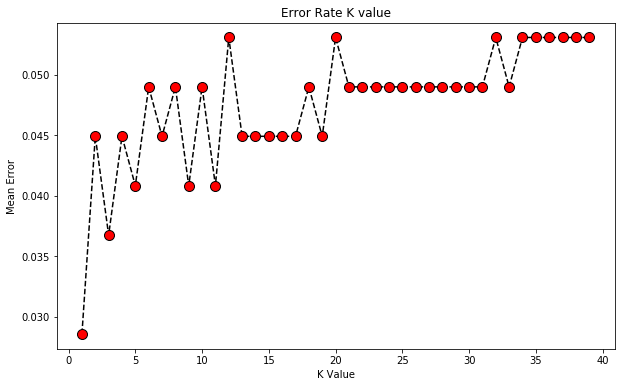

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.plot(range(1,40),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)